# Ocean biogeochemistry and trace metal oceanography field history

Based on searches within Web of Science.

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from collections import Counter

%matplotlib inline

Parameters / folder names

In [2]:
folder_base   = '/ocean/brogalla/GEOTRACES/data/web-of-science/2023/'

Load data

In [3]:
# Load Web of Science output files:
GEOTRACES     = pd.read_csv(f'{folder_base}GEOTRACES.csv', header=10)
GEOSECS       = pd.read_csv(f'{folder_base}GEOSECS.csv', header=10)
JGOFS         = pd.read_csv(f'{folder_base}joint-global-ocean-flux-study.csv', header=10)
WOCE          = pd.read_csv(f'{folder_base}world-ocean-circulation-experiment.csv', header=10)
biochem       = pd.read_csv(f'{folder_base}ocean-biogeochemistry.csv', header=10)
biochem_model = pd.read_csv(f'{folder_base}ocean-biogeochemistry-modelling.csv', header=10)

# Load publication year of each entry in the files
GEOTRACES['Publication Year'][GEOTRACES['Publication Year'] == 'DEC 20 2015'] = '2015' # correct one weird entry
GEOTRACES_publication_years = GEOTRACES['Publication Year'].astype(int).values
GEOSECS_publication_years   = GEOSECS['Publication Year'].values
JGOFS_publication_years     = JGOFS['Publication Year'].values
WOCE_publication_years      = WOCE['Publication Year'].values
biochem_publication_years   = biochem['Publication Year'].values
biochem_model_publication_years = biochem_model['Publication Year'].values

/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [4]:
# Count number of publications 
cGEOTRACES     = pd.DataFrame.from_dict(Counter(GEOTRACES_publication_years), orient='index').reset_index()
cGEOSECS       = pd.DataFrame.from_dict(Counter(GEOSECS_publication_years), orient='index').reset_index()
cJGOFS         = pd.DataFrame.from_dict(Counter(JGOFS_publication_years), orient='index').reset_index()
cWOCE          = pd.DataFrame.from_dict(Counter(WOCE_publication_years), orient='index').reset_index()
cbiochem       = pd.DataFrame.from_dict(Counter(biochem_publication_years), orient='index').reset_index()
cbiochem_model = pd.DataFrame.from_dict(Counter(biochem_model_publication_years), orient='index').reset_index()

cGEOTRACES     = cGEOTRACES.rename(columns={'index':'year', 0:'count'})
cGEOSECS       = cGEOSECS.rename(columns={'index':'year', 0:'count'})
cJGOFS         = cJGOFS.rename(columns={'index':'year', 0:'count'})
cWOCE          = cWOCE.rename(columns={'index':'year', 0:'count'})
cbiochem       = cbiochem.rename(columns={'index':'year', 0:'count'})
cbiochem_model = cbiochem_model.rename(columns={'index':'year', 0:'count'})

In [12]:
print(cGEOTRACES.sort_values('year'))

    year  count
9   2007      1
5   2008      3
11  2009      1
2   2010      5
10  2011     10
3   2012     38
0   2013     32
8   2014     33
1   2015     83
6   2016     41
7   2017     48
4   2018     88
13  2019     79
12  2020     72
14  2021     65
15  2022     54


In [7]:
# Estimate of total number of publications in all programs:
all_publication_years = np.concatenate((GEOTRACES_publication_years, GEOSECS_publication_years, \
                                      JGOFS_publication_years, WOCE_publication_years))

In [8]:
print(len(all_publication_years))
print(len(GEOTRACES_publication_years))
print(len(GEOSECS_publication_years))
print(len(JGOFS_publication_years))
print(len(WOCE_publication_years))

1860
653
158
220
829


### Make figure

Using seaborn histplot. 

/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


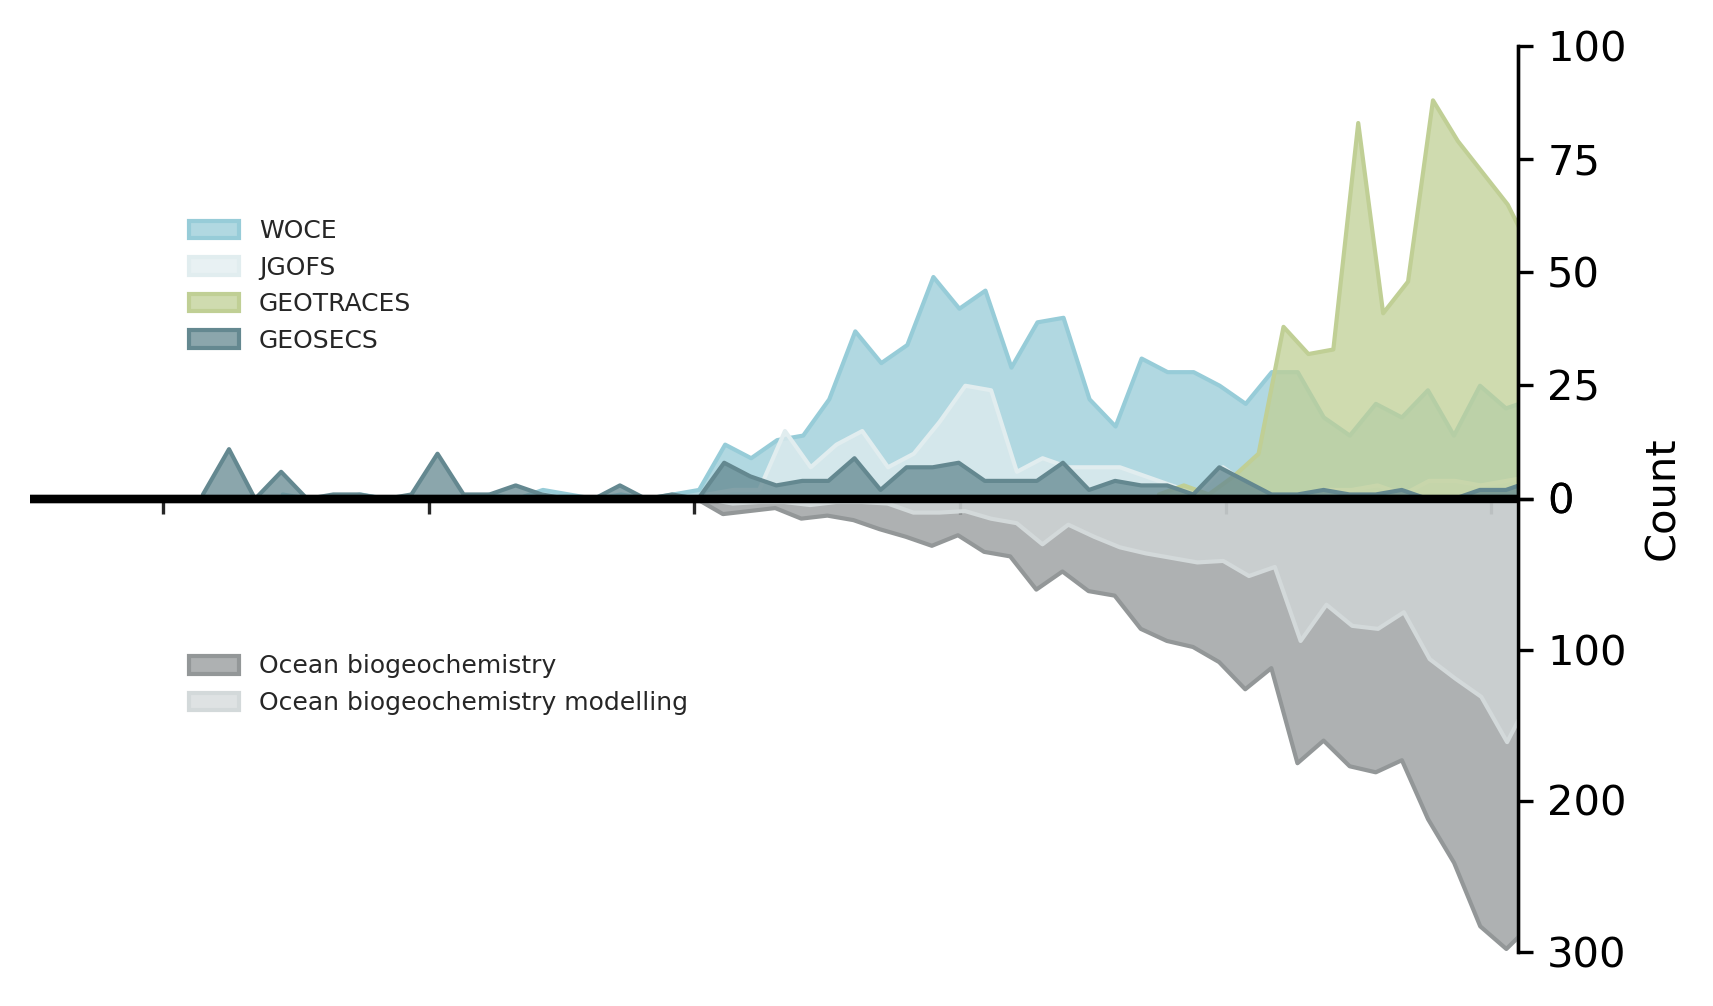

In [27]:
fig, ax = plt.subplots(1,1, figsize=(6.4,4.0), dpi=300)
ax2 = ax.twinx()
ax2.invert_yaxis()
st  = sns.axes_style("whitegrid")
color_list = ['#97ccd8','#648890','#e1edef','#c0cf95']
sns.set_palette(sns.color_palette(color_list))

with st:    
    sns.histplot(WOCE_publication_years     , label='WOCE', ax=ax, fill=True, color=color_list[0], stat='count', \
                 bins=np.unique(WOCE_publication_years)[-1]+1-np.unique(WOCE_publication_years)[0], element="poly")     
    sns.histplot(JGOFS_publication_years    , label='JGOFS', ax=ax, fill=True, color=color_list[2], stat='count', \
                 bins=np.unique(JGOFS_publication_years)[-1]+1-np.unique(JGOFS_publication_years)[0], element="poly") 
    sns.histplot(GEOTRACES_publication_years, label='GEOTRACES', ax=ax, fill=True, color=color_list[3], stat='count', \
                 bins=np.unique(GEOTRACES_publication_years)[-1]+1-np.unique(GEOTRACES_publication_years)[0], element="poly")
    sns.histplot(GEOSECS_publication_years  , label='GEOSECS',  ax=ax, fill=True, color=color_list[1], stat='count', \
                 bins=np.unique(GEOSECS_publication_years)[-1]+1-np.unique(GEOSECS_publication_years)[0], element="poly")
    
    sns.histplot(biochem_publication_years      , label='Ocean biogeochemistry', ax=ax2, fill=True, stat='count',\
                 bins=np.unique(biochem_publication_years)[-1]+1-np.unique(biochem_publication_years)[0], \
                 color='#939798', element="poly", zorder=1)
    sns.histplot(biochem_model_publication_years      , label='Ocean biogeochemistry modelling', ax=ax2, fill=True, stat='count',\
                 bins=np.unique(biochem_model_publication_years)[-1]+1-np.unique(biochem_model_publication_years)[0], \
                 color='#d3d9da', element="poly", zorder=1)
    
    ax.set(xlim=(1965, 2021), ylim=(-100, 100))
    ax2.set(ylim=(300, -300))
    ax.legend(loc=(0.1,0.65), frameon=False, fontsize=6)
    ax2.legend(loc=(0.1,0.25), frameon=False, fontsize=6)
    ax.spines['bottom'].set_position('zero')
    ax.spines['bottom'].set_smart_bounds(True)
    for axis in [ax, ax2]:
        axis.spines['bottom'].set_visible(False)
        axis.spines['top'].set_visible(False)
        axis.spines['left'].set_visible(False)
        axis.xaxis.set_ticks_position('bottom')
        axis.axhline(linewidth=2, color='k')
        axis.xaxis.set_ticks_position('bottom')
        axis.xaxis.set_ticklabels([])
    
    # only needed because I have these double vertical axes with different scales:
    ax.set_ylabel('')  
    ax.yaxis.set_ticks_position('right')
    ax.set_yticks([0, 25, 50, 75, 100])
    ax2.set_yticks([0, 100, 200, 300])
    
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/trace-metal-history-20230427.jpg', bbox_inches='tight', dpi=300)